# Quantum Mechanics Midterm Part 2
- **Name**: Juan Daniel Vasconez Vela
- **Semester**: IISEM2024
- **Date**: October 2024
- **Last Update**: 19/10/2024

This notebook contains solutions and analysis for the midterm part 2 exercises based on quantum mechanics concepts, for my quantum mechanics course on 2024

### Enviroment preparation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as ctn

### Excercise 1 Square potential barrier
 Consider a current of particles with energies E>V0 moving from x = 1 to the right,
 under the influence of this potential:
\begin{equation}
V(x) = 
\begin{cases} 
0, & \text{if } x < 0 \\
V_0, & \text{if } 0 \leq x \leq L \\
0, & \text{if } x > L 
\end{cases}
\end{equation}


#### (a) Use your favourite programming tool to sketch the potential and write down the time independent Schrödinger equation.
---

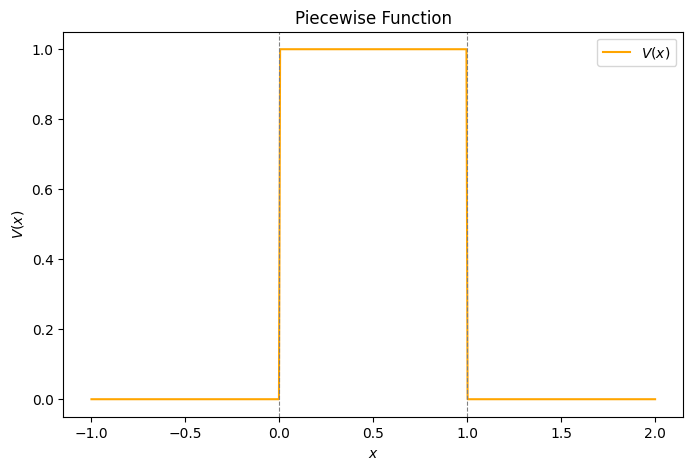

In [33]:
# Define the piecewise function
def V(x, V0=1, L=1):
    return np.piecewise(x, [x < 0, (x >= 0) & (x <= L), x > L], [0, V0, 0])

# Set the range for x
x = np.linspace(-1, 2, 500)

# Compute V(x)
V_values = V(x, V0=1, L=1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, V_values, label='$V(x)$', c = 'orange')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title('Piecewise Function')
plt.axvline(0, color='gray', linestyle='--', lw=0.8)
plt.axvline(1, color='gray', linestyle='--', lw=0.8)
plt.legend()
plt.show()

And for this equation, our time-independant schrodinger equation is:

\begin{equation}
-\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x^2} + V(x) \psi(x) = E \psi
\end{equation}

#### (b) Find the stationary state solutions for each region of interest
---

For, this part of the problem we will divide the problem in 3 parts of interest, which will be, region I, II and III as shown in the next graphic:

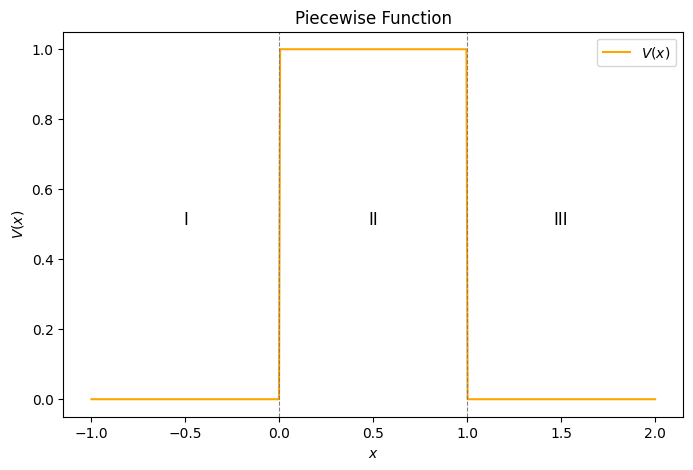

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(x, V_values, label='$V(x)$', c='orange')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title('Piecewise Function')
plt.axvline(0, color='gray', linestyle='--', lw=0.8)
plt.axvline(1, color='gray', linestyle='--', lw=0.8)

# Add annotations for each region
plt.text(-0.5, 0.5, 'I', fontsize=12, color='black', horizontalalignment='center')
plt.text(0.5, 0.5, 'II', fontsize=12, color='black', horizontalalignment='center')
plt.text(1.5, 0.5, 'III', fontsize=12, color='black', horizontalalignment='center')

plt.legend()
plt.show()

As we see, for this problem, we have 3 regions of interest, which we will solve next, now, the Schrödinger Equation can be written like this:
$$ -i \hbar \frac{\partial \Psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2} + V \Psi $$
Therefore, since our potential just deppends on X, we can prupouse a solution for this EDP which envolves separation of variables.
$$\Psi(x,t) = \psi(x) \varphi(t)$$
Where, $\gamma$ is the wiggle factor, and it will be defined as:
$$\varphi(t) = e^{-i\frac{E}{\hbar}t}$$

##### Regions I and III

For both regions, we know that the time independant Schrödinger Equation is stated as:
$$-\frac{\hbar^2}{2m} \frac{d\psi (x)}{dx^2} = E \psi(x)$$
For which we can describe
$$ k = \sqrt{\frac{2mE}{\hbar^2}}$$
Therefore rewritting the Schrödinger Equation:
$$\frac{d\psi (x)}{dx^2} = - k^2 \psi(x)$$
And this getting us the general solutions:
$$\psi_I (x) = A e^{ikx} + B e^{-ikx} \\ \psi_{II} (x) = F e^{ikx} + G e^{-ikx}$$
Where we know that for $e^{ikx}$ represents a particle moving in the +x direction and $e^{-ikx}$ represents a particle moving in the -x direction, therefore in our solutions for region I and II will have coefficientes A and B non-zero, but for coefficient G, we can know that represents an unphysical solution becuase it represents a particle inexitent comming from +x direction. Therefore:
$$\psi_I (x) = A e^{ikx} + B e^{-ikx} \\ \psi_{III} (x) = F e^{ikx}$$

##### For region II

Now, for our particle in region II, we will rewrite our Schrödinger equation as:
$$-\frac{\hbar^2}{2m} \frac{d\psi (x)}{dx^2}  + V_0 \psi(x)= E \psi(x)$$
Where we can describe our new parameter as:
$$ k^{'} = \sqrt{\frac{2m(V_0-E)}{\hbar^2}}$$
And then rewrite the Schrödinger equation like:
$$\frac{d\psi (x)}{dx^2} = -(k^{'})^2 \psi(x)$$
And this getting us a general solution stated as:
$$\psi_{II} = C e^{ik^{'}x} + D e^{-ik^{'}x}$$

#### (c) Express the transmitted and reflected amplitudes in terms of the incident amplitude.
---

Now, by having this solutions:
$$\psi_I (x) = A e^{ikx} + B e^{-ikx}$$
$$\psi_{II} = C e^{k^{'}x} + D e^{-k^{'}x}$$
$$\psi_{III} (x) = F e^{ikx}$$
We should apply the boundary conditions to get our coefficients, this BCs imply that:
$$\psi_I(x=0) = \psi_{II}(x=0) \\
\psi_{II} (x=L) = \psi_{III}(x=L)$$
And also:
$$\left.\frac{d\psi_I(x)}{dx}\right|_{0} = \left.\frac{d\psi_{II}(x)}{dx}\right|_{0} \\
\left.\frac{d\psi_{II}(x)}{dx}\right|_{L} = \left.\frac{d\psi_{III}(x)}{dx}\right|_{L}$$
So first, proving continuity on x=0:
$$Ae^{ikx} + Be^{-ikx} = C \sin k^{'}x + D \cos k^{'}x \\
A+B = D$$
Now, for smoothness on x=0:
$$\frac{d\psi_I}{dx}(0) = \frac{d\psi_{II}}{dx}(0) \\
ik(Ae^{ikx}-Be^{-ikx}) = k^{'}(C \cos k^{'}x - D \sin k^{'}x) \\
ik(A-B)=k^{'}C$$
Therefore, we have to show continuity after our V(x) so, for continuity on x=L
$$\psi_II (L) = \psi_III(L) \\
C \sin k^{'}x + D \cos k^{'}x = F e^{-ikx} \\
C \sin k^{'}L +  D \cos k^{'}L = F e^{-ikL}$$
And smoothness on x=L:
$$ \frac{d\psi_{II} (L)}{dx} = \frac{d\psi_{III}}{dx} \\
k^{'}(C \cos k^{'}x + D \cos k^{'}x) = ikF e^{-ikx}$$
$$ k^{'}(C\cos{k^{'}L}- D \sin{K^{'}L}) = ikF \ e^{ikL}$$
Taking Smoothness on x=0 and solving them for C, we can get:
$$ C = \frac{F \ e^{ikL}-D \cos{k^{'}L}}{\sin{k^{'}L}}$$
$$ C = \frac{\frac{ik}{k^{'}}F \ e^{ikL}+D \sin{k^{'}L}}{\cos{k^{'}L}}$$
And by making the equations for continuity on x=L be equal, we can get:
$$\cos{k^{'}L} \left(F \ e^{ikL}-D \cos{k^{'}L}\right) = \sin{k^{'}L} \left(\frac{ik}{k^{'}}F \ e^{ikL}+D \sin{k^{'}L}\right)$$
$$F \ e^{ikL}\cos{k^{'}L}-D\cos^2{k^{'}L} = \frac{ik}{k^{'}}F \ e^{ikL}\sin{k^{'}L} + D \sin^2{k^{'}L} $$
$$F \ e^{ikL}\cos{k^{'}L}-\frac{ik}{k^{'}}F \ e^{ikL}\sin{k^{'}L}= D (\sin^2{k^{'}L}+\cos^2{k^{'}L}) $$
$$ \boxed{D = F \ e^{ikL} \left[ \cos{k^{'}L}-\frac{ik}{k^{'}}\sin{k^{'}L}\right]}$$
Now, by taking our first C equations and plugging back D, we can have:
$$ \boxed{C = F \ e^{ikL}\left[\sin{k^{'}L}+\frac{ik}{k^{'}}\cos{k^{'}L}\right]} $$
Now, using previous results to solve for continuity on x=0:
$$ A+B = F \ e^{ikL} \left[ \cos{k^{'}L}-\frac{ik}{k^{'}}\sin{k^{'}L}\right]$$
$$ A-B = \frac{k^{'}}{ik} F \ e^{ikL}\left[\sin{k^{'}L}+\frac{ik}{k^{'}}\cos{k^{'}L}\right]$$
Therefore by summing the previous equations:
$$ 2A = F \ e^{ikL} \left[ 2\cos{k^{'}L}-i \frac{k^2+(k^{'})^2}{2kk^{'}} \sin{k^{'}L} \right] $$
Gettin F: 
$$ \boxed{F = \frac{A \ e^{-ikL}}{\cos{k^{'}L}-i \frac{k^2+(k^{'})^2}{2kk^{'}} \sin{k^{'}L}}} $$
And substracting the same equations:

$$ 2B = F \ e^{ikL} \left[ \frac{ik^{'}}{k}\sin{k^{'}L} - \frac{ik}{k^{'}}\sin{k^{'}L}\right] $$
Finally, we can get: 
$$ \boxed{B = i F \ e^{ikL} \left[ \frac{(k^{'})^2-k^2}{2kk^{'}} \sin{k^{'}L}\right]}$$

Therefore, we can write the incident wave as:
$$ \psi(x) = A e^{ikx}$$
With the amplitude A

And also a transmited wave written like:
$$\psi(x) = F e^{ikx}$$
With an amplitude:
$$F = \frac{A \ e^{-ikL}}{\cos{k^{'}L}-i \frac{k^2+(k^{'})^2}{2kk^{'}} \sin{k^{'}L}}$$
And finally the reflected wave described by:
$$\psi(x) = B e^{-ikx}$$
With an amplitude described by:
$$B = i \frac{A \left[ \frac{(k^{'})^2-k^2}{2kk^{'}} \sin{k^{'}L}\right] }{\cos{k^{'}L}-i \frac{k^2+(k^{'})^2}{kk^{'}}} \sin{k^{'}L}$$

#### (d) Use your favourite programming tool to sketch the solutions for the stationary states found in part (b), which describe particles arriving from x = 1 with energy E>V0.
---

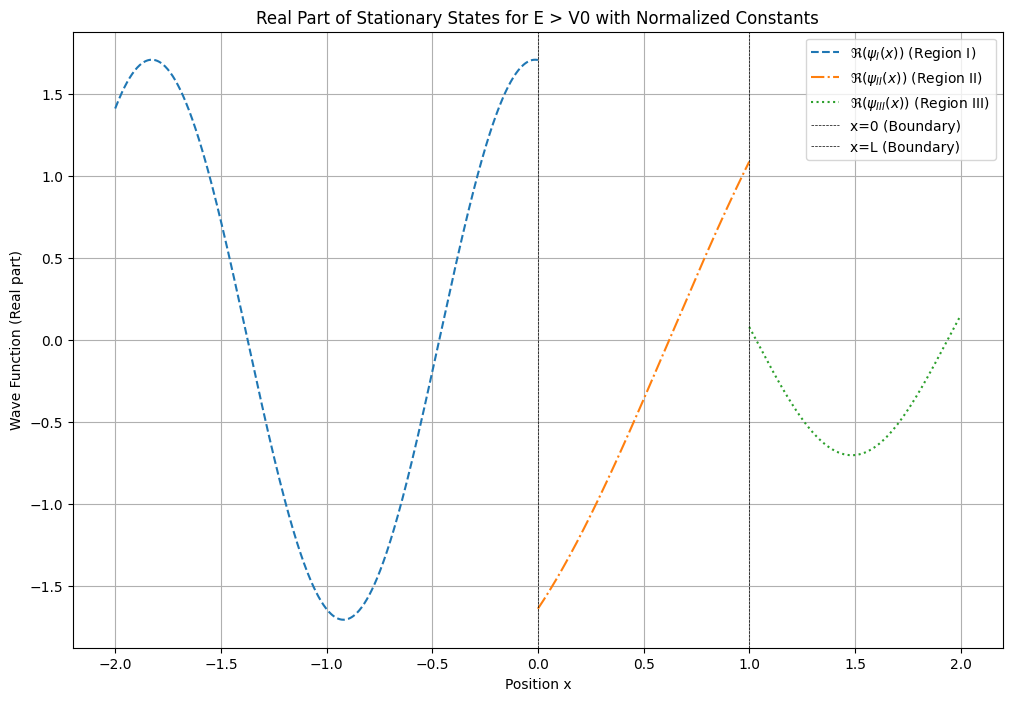

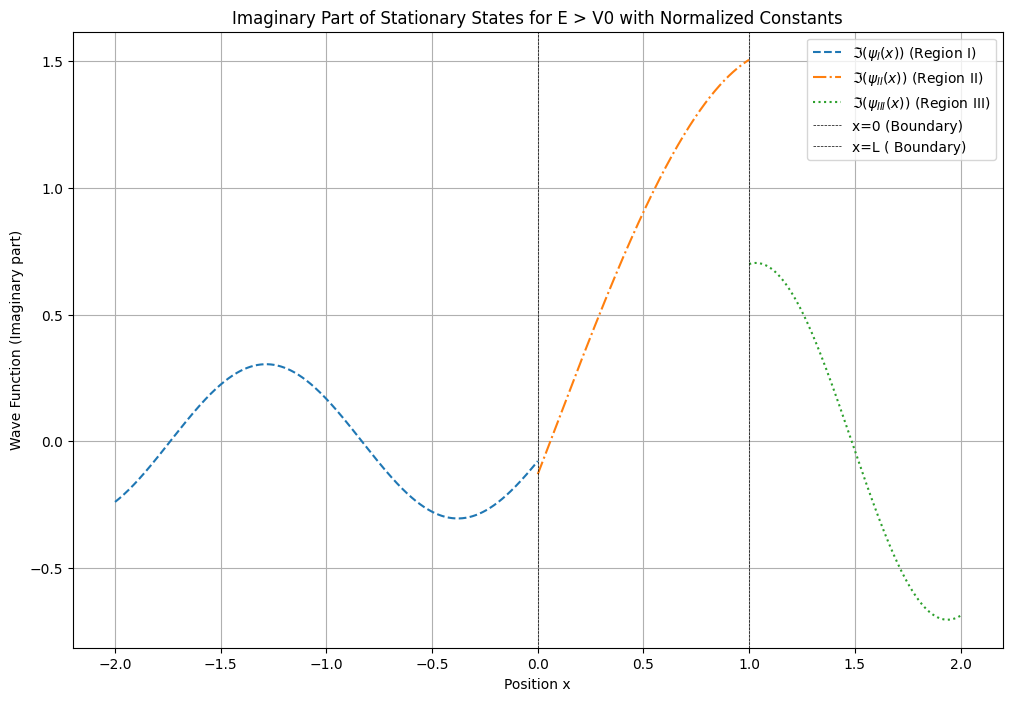

In [35]:
# Constants
L = 1.0  
h = 1 
m = 1 
E = 6
v0 = 5

# Wave numbers in different regions
k = np.sqrt(2 * m * E) / h 
k_prime = np.sqrt(2 * m * (E - v0)) / h 

A_val = 1

# Coefficients
F = A_val * np.exp(-1j * k * L) / (np.cos(k_prime * L) - 1j * (k**2 + k_prime**2) / (2 * k * k_prime) * np.sin(k_prime * L))
B = 1j * A_val * ((k_prime**2 - k**2) / (2 * k * k_prime) * np.sin(k_prime * L)) / \
    (np.cos(k_prime * L) - 1j * (k**2 + k_prime**2) / (2 * k * k_prime) * np.sin(k_prime * L))

C = F * (np.sin(k_prime * L) + 1j * (k / k_prime) * np.cos(k_prime * L))
D = F * (np.cos(k_prime * L) - 1j * (k / k_prime) * np.sin(k_prime * L))

# Real part functions
def psi_I_real(x):
    return np.real(A_val * np.exp(1j * k * x)) + np.real(B * np.exp(-1j * k * x))

def psi_II_real(x):
    return np.real(C * np.exp(1j * k_prime * x) + D * np.exp(-1j * k_prime * x))

def psi_III_real(x):
    return np.real(F * np.exp(1j * k * x))

# Imaginary part functions
def psi_I_imag(x):
    return np.imag(A_val * np.exp(1j * k * x)) + np.imag(B * np.exp(-1j * k * x))

def psi_II_imag(x):
    return np.imag(C * np.exp(1j * k_prime * x) + D * np.exp(-1j * k_prime * x))

def psi_III_imag(x):
    return np.imag(F * np.exp(1j * k * x))

# Define x regions
x_region_I = np.linspace(-2*L, 0, 500)
x_region_II = np.linspace(0, L, 500)
x_region_III = np.linspace(L, 2*L, 500)

# Calculate wave function values
psi_I_real_vals = psi_I_real(x_region_I)
psi_I_imag_vals = psi_I_imag(x_region_I)
psi_II_real_vals = psi_II_real(x_region_II)
psi_II_imag_vals = psi_II_imag(x_region_II)
psi_III_real_vals = psi_III_real(x_region_III)
psi_III_imag_vals = psi_III_imag(x_region_III)

# Plotting the real part of the wave functions
plt.figure(figsize=(12, 8))
plt.plot(x_region_I, psi_I_real_vals, label=r'$\Re(\psi_I(x))$ (Region I)', linestyle='--')
plt.plot(x_region_II, psi_II_real_vals, label=r'$\Re(\psi_{II}(x))$ (Region II)', linestyle='-.')
plt.plot(x_region_III, psi_III_real_vals, label=r'$\Re(\psi_{III}(x))$ (Region III)', linestyle=':')
plt.axvline(0, color='k', linestyle='--', linewidth=0.5, label='x=0 (Boundary)')
plt.axvline(L, color='k', linestyle='--', linewidth=0.5, label='x=L (Boundary)')
plt.xlabel('Position x')
plt.ylabel('Wave Function (Real part)')
plt.title('Real Part of Stationary States for E > V0 with Normalized Constants')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plotting the imaginary part of the wave functions
plt.figure(figsize=(12, 8))
plt.plot(x_region_I, psi_I_imag_vals, label=r'$\Im(\psi_I(x))$ (Region I)', linestyle='--')
plt.plot(x_region_II, psi_II_imag_vals, label=r'$\Im(\psi_{II}(x))$ (Region II)', linestyle='-.')
plt.plot(x_region_III, psi_III_imag_vals, label=r'$\Im(\psi_{III}(x))$ (Region III)', linestyle=':')
plt.axvline(0, color='k', linestyle='--', linewidth=0.5, label='x=0 (Boundary)')
plt.axvline(L, color='k', linestyle='--', linewidth=0.5, label='x=L ( Boundary)')
plt.xlabel('Position x')
plt.ylabel('Wave Function (Imaginary part)')
plt.title('Imaginary Part of Stationary States for E > V0 with Normalized Constants')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

####  (e) Using the result from part (c), compute the transmission and reflection coefficients for particles with E>V0. Sketch these coefficients versus the barrier width, L,andbriefly discuss the results.
---



Dadas las soluciones de las funciones de onda:

$$
\psi_I (x) = A e^{ikx} + B e^{-ikx}
$$

$$
\psi_{II} = C e^{k^{'}x} + D e^{-k^{'}x}
$$

$$
\psi_{III} (x) = F e^{ikx}
$$

Coeficiente de Transmisión T:

El coeficiente de transmisión se define como la relación entre la corriente de probabilidad transmitida y la corriente de probabilidad incidente:

$$
T = \left| \frac{F}{A} \right|^2
$$

Sustituyendo la expresión para F:

$$
F = \frac{A \, e^{-ikL}}{\cos{k^{'}L} - i \, \frac{k^2 + (k^{'})^2}{2kk^{'}} \, \sin{k^{'}L}}
$$

Por lo tanto:

$$
T = \left| \frac{e^{-ikL}}{\cos{k^{'}L} - i \, \frac{k^2 + (k^{'})^2}{2kk^{'}} \, \sin{k^{'}L}} \right|^2
$$

Calculando el módulo:

$$
T = \frac{1}{\cos^2{k^{'}L} + \left( \frac{k^2 + (k^{'})^2}{2kk^{'}} \, \sin{k^{'}L} \right)^2}
$$

Coeficiente de Reflexión R:

El coeficiente de reflexión se define como la relación entre la corriente de probabilidad reflejada y la corriente de probabilidad incidente:

$$
R = \left| \frac{B}{A} \right|^2
$$

Sustituyendo la expresión para \( B \):

$$
B = i \, \frac{A \, \left[ \frac{(k^{'})^2 - k^2}{2kk^{'}} \, \sin{k^{'}L} \right]}{\cos{k^{'}L} - i \, \frac{k^2 + (k^{'})^2}{2kk^{'}} \, \sin{k^{'}L}}
$$

Por lo tanto:

$$
R = \frac{\left( \frac{(k^{'})^2 - k^2}{2kk^{'}} \, \sin{k^{'}L} \right)^2}{\cos^2{k^{'}L} + \left( \frac{k^2 + (k^{'})^2}{2kk^{'}} \, \sin{k^{'}L} \right)^2}
$$

Conservación de Probabilidad

La suma de los coeficientes de transmisión y reflexión debe ser igual a 1, lo que refleja la conservación de la probabilidad:

$$
T + R = 1
$$


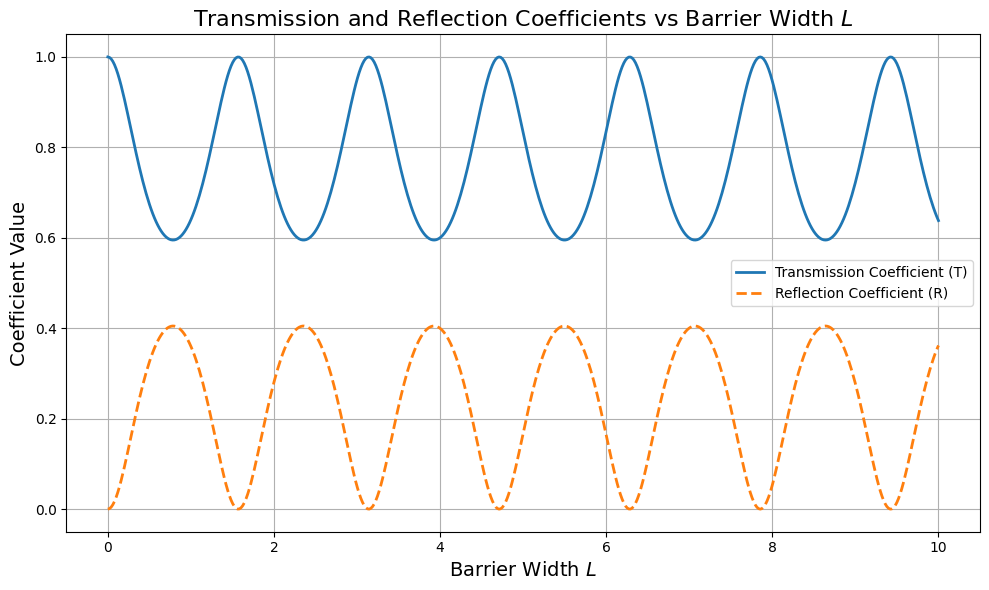

In [36]:
L_vals = np.linspace(0, 10, 500)
m = 1 
E = 9  
v0 = 7  

# Wave numbers in different regions
k = np.sqrt(2 * m * E) / h  
k_prime = np.sqrt(2 * m * (E - v0)) / h 

cos_kL = np.cos(k_prime * L_vals)
sin_kL = np.sin(k_prime * L_vals)
numerator_T = 1
denominator_T = cos_kL**2 + ( (k**2 + k_prime**2) / (2 * k * k_prime) * sin_kL )**2
T_vals = numerator_T / denominator_T

numerator_R = ( (k_prime**2 - k**2) / (2 * k * k_prime) * sin_kL )**2
R_vals = numerator_R / denominator_T

# Plotting Transmission and Reflection Coefficients vs Barrier Width L
plt.figure(figsize=(10, 6))
plt.plot(L_vals, T_vals, label='Transmission Coefficient (T)', linewidth=2)
plt.plot(L_vals, R_vals, label='Reflection Coefficient (R)', linewidth=2, linestyle='--')
plt.xlabel('Barrier Width $L$', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)
plt.title('Transmission and Reflection Coefficients vs Barrier Width $L$', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot displays oscillatory behavior between transmission (solid blue line) and reflection (dashed orange line) coefficients versus barrier width L. As shown by their complementary oscillations, when transmission reaches its maximum peaks of 1.0, reflection drops to zero, and vice versa. These periodic oscillations maintain consistent amplitude and frequency throughout the entire range of barrier width, demonstrating a regular pattern in the quantum tunneling behavior.

### Wave packet and probability density 
A free particle of mass m has the following wave function at time t=0:
\begin{equation}
\Psi(x,0) = \frac{\sqrt{\alpha}}{(2 \pi)^{3/4}} \int_{-\infty}^{\infty} e^{-\frac{\alpha^2}{4} (k-ko)^2} e^{ikx} dk
\end{equation} 

####  (a) Find an expression for $\phi(k)$.
---

We know that for Dirichlet theorem:
$$\Psi(x,0)= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty \phi(k) e^{ikx}dx$$
So taking in account the integral from the problem, we can obtain a expression for $\phi(k)$ as:
$$\phi(k) = \frac{\sqrt{\alpha}}{(2\pi)^{\frac{1}{4}}} e^{-\frac{\alpha^2}{4}(k-k_o)^2} $$
Now, if we create a new variable $A =\frac{\sqrt{\alpha}}{(2\pi)^{\frac{1}{4}}}$:
$$\phi(k) = A e^{-\frac{\alpha^2}{4}(k-k_o)^2} $$

#### (b) Calculate the time-dependent wave packet (x,t).
---

Our wave packet is defined as:
$$\Psi(x,t)= \frac{A}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{k^2\left(\frac{-\alpha^2}{4}-\frac{i\hbar}{2m}t\right)+k\left(\frac{k_0\alpha^2}{2}+iz\right)-\frac{\alpha^2 k_0^2}{4}}dk$$
To solve this integral we will reduce our problem notation with some small changes and renaming new variables:
$$ d = \frac{m\alpha^2 + 2i\hbar t}{4m}$$
$$ j = \frac{k_0 \alpha^2 + 2ix}{2}$$
$$ g = - \frac{\alpha^2 k_0^2}{4}$$
Therefore we will end up with this integral:
$$\Psi(x, t)= \frac{A}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{-dk^2 + jk + g}dk$$
Now, let’s simplify further this problem by factorizing the exponent:
$$
   -dk^2 + jk = -d \left(k^2 - \frac{j}{d} k\right)
$$
$$
   -d \left[k^2 - \frac{j}{d} k + \left(\frac{j}{2d}\right)^2 - \left(\frac{j}{2d}\right)^2\right]
$$
$$
   -d \left[\left(k - \frac{j}{2d}\right)^2 - \left(\frac{j}{2d}\right)^2\right]
$$
$$
   -d \left(k - \frac{j}{2d}\right)^2 + \frac{j^2}{4d}
$$
So now, our integral becomes: 
$$
\Psi(x, t) = \frac{A}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{-d \left(k - \frac{j}{2d}\right)^2 + \frac{j^2}{4d} + g} \, dk
$$
A little algebra for the constants will take us to the expression: 
$$
\Psi(x, t) = \frac{A}{\sqrt{2\pi}} e^{\frac{j^2}{4d} + g} \int_{-\infty}^\infty e^{-d \left(k - \frac{j}{2d}\right)^2} \, dk
$$
And knowing that the integral $\int_{-\infty}^\infty e^{-d u^2} \, du$ is a standard Gaussian integral, where $ u = k - \frac{j}{2d}$. The result is:
$$
\sqrt{\frac{\pi}{d}}
$$
We get: 
$$
\Psi(x, t) = \frac{A}{\sqrt{2\pi}} e^{\frac{j^2}{4d} + g} \cdot \sqrt{\frac{\pi}{d}}
$$
And simplified:
$$
\boxed{\Psi(x, t) = A \frac{1}{\sqrt{2d}} e^{\frac{j^2}{4d} + g}}
$$
Finally, for further rigor, we will integrate the function using SymPy to have a congruent solution.


In [37]:
# Define symbols
k, d, j, g, A = sp.symbols('k d j g A', real=True, positive=True)

# Define the integrand with completed square in terms of k
integrand =  sp.exp(-d * (k - j/(2*d))**2 + (j**2/(4*d)) + g)

# Integrate over the infinite domain
integral_solution = sp.integrate(integrand, (k, -sp.oo, sp.oo))

# Simplify the final solution
simplified_solution = sp.simplify(integral_solution)

# Display the final solution
simplified_solution

sqrt(pi)*exp(g + j**2/(4*d))/sqrt(d)

Now, we revert the variables to their original form:

$$d = \frac{m\alpha^2 + 2i\hbar t}{4m} $$
$$j = \frac{k_0 \alpha^2 + 2ix}{2} $$
$$g = - \frac{\alpha^2 k_0^2}{4} $$

The final expression for the wave packet is:
$$
\boxed{\Psi(x, t) = \gamma \cdot \sqrt{\frac{m \alpha}{m\alpha^2 + 2i\hbar t}} \cdot \exp \left( \frac{m \left( k_0 \alpha^2 + 2ix \right)^2}{4 \left( m\alpha^2 + 2i\hbar t \right)} - \frac{\alpha^2 k_0^2}{4} \right)}
$$
Where $\gamma = \sqrt[4]{\frac{2}{\pi}}$

####  (c) Calculate the probability density $|\Psi(x,t)|^2$.
---

To calculate this PDF, we will use sympy to make it faster and optimized to calculate the product as:
$$\big| \Psi(x,t) \big|^2 = \Psi(x,t) \cdot \Psi^*(x,t)$$

In [38]:
# Define symbols
x, t, gamma, m, alpha, hbar, k0 = sp.symbols('x t gamma m alpha hbar k0', real=True)
i = sp.I 

exp = (k0*alpha**2 + 2*i*x)**2 / (m*alpha**2 + 2*i*hbar*t)
exp_conj = (k0*alpha**2 - 2*i*x)**2 / (m*alpha**2 - 2*i*hbar*t)
exp_norm = (m/4) * (exp + exp_conj)
# Simplify the result
pdf = sp.simplify(exp_norm)
pdf

alpha**2*m*(alpha**4*k0**2*m + 8*hbar*k0*t*x - 4*m*x**2)/(2*(alpha**4*m**2 + 4*hbar**2*t**2))

Therefore our PDF is defined as: 
$$\big| \Psi(x,t) \big|^2 =\sqrt{\frac{2}{\pi}} \cdot \frac{\alpha m}{\sqrt{\alpha^{4} m^{2} + 4 \hbar^{2} t^{2}}} \, e^{\frac{\alpha^{2} m \left(\alpha^{4} k_{0}^{2} m + 8 \hbar k_{0} t x - 4 m x^{2}\right)}{2 \left(\alpha^{4} m^{2} + 4 \hbar^{2} t^{2}\right)} - \frac{\alpha^2 k_0^2}{2}}
$$

#### (d) Use your favourite programming tool to plot the probability density for t =0 and t>0, and briefly explain your findings.
---

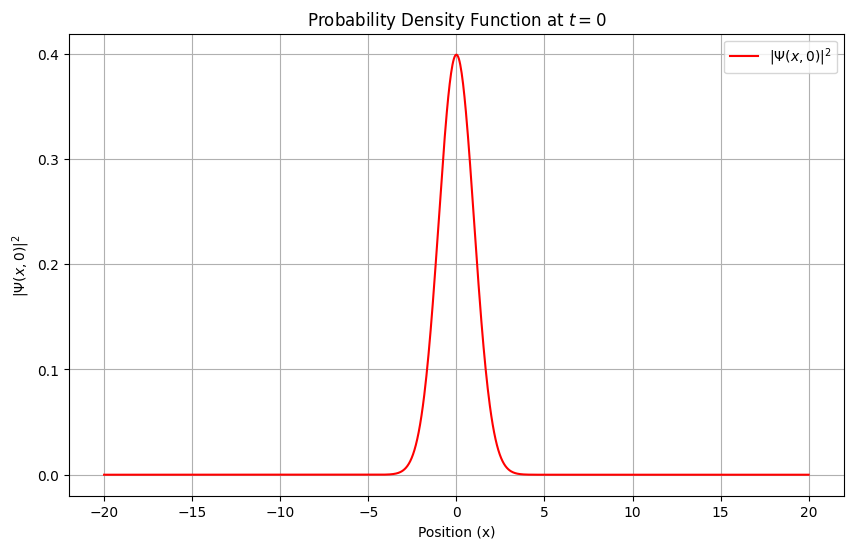

In [39]:
# Define the values
x_values = np.linspace(-20, 20, 1000)
mass = ctn.m_e
alpha_val = 2
k0_val = 5 * np.pi
hbar_val = ctn.hbar
time = 0
pi_val = np.pi

def probability_density(x):
    # Coefficient
    coefficient = np.sqrt(2 / pi_val) * (mass * alpha_val) / np.sqrt(mass**2 * alpha_val**4 + 4 * hbar_val**2 * time**2)
    
    # First exponent
    exp1 = np.exp(-alpha_val**2 * k0_val**2 / 2)
    
    # Second exponent
    exp2_numerator = alpha_val**2 * mass * (alpha_val**4 * k0_val**2 * mass + 8 * hbar_val * k0_val * time * x - 4 * mass * x**2)
    exp2_denominator = 2 * (alpha_val**4 * mass**2 + 4 * hbar_val**2 * time**2)
    exp2 = np.exp(exp2_numerator / exp2_denominator)
    
    # Probability density
    density = coefficient * exp1 * exp2

    return density

# Evaluate the function for the x_values
y_values = [probability_density(x) for x in x_values]

# Convert the list to a NumPy array
y_values = np.array(y_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, c='red', label=r"$|\Psi(x,0)|^2$")
plt.yticks(np.arange(0, max(y_values) + 0.1, 0.1))
plt.xlabel('Position (x)')
plt.ylabel(r'$|\Psi(x,0)|^2$')
plt.title(r"Probability Density Function at $t=0$")
plt.legend()
plt.grid(True)
plt.show()


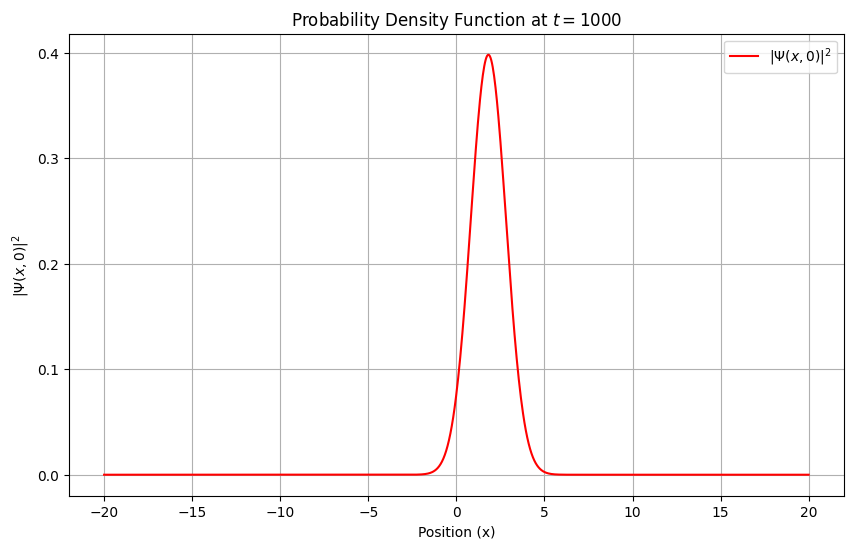

In [40]:
# Define the values
x_values = np.linspace(-20, 20, 1000)
mass = ctn.m_e
alpha_val = 2
k0_val = 5 * np.pi
hbar_val = ctn.hbar
time = 1000


def probability_density(x):
    # Coefficient
    coefficient = np.sqrt(2 / pi_val) * (mass * alpha_val) / np.sqrt(mass**2 * alpha_val**4 + 4 * hbar_val**2 * time**2)
    
    # First exponent
    exp1 = np.exp(-alpha_val**2 * k0_val**2 / 2)
    
    # Second exponent
    exp2_numerator = alpha_val**2 * mass * (alpha_val**4 * k0_val**2 * mass + 8 * hbar_val * k0_val * time * x - 4 * mass * x**2)
    exp2_denominator = 2 * (alpha_val**4 * mass**2 + 4 * hbar_val**2 * time**2)
    exp2 = np.exp(exp2_numerator / exp2_denominator)
    
    # Probability density
    density = coefficient * exp1 * exp2

    return density

# Evaluate the function for the x_values
y_values = [probability_density(x) for x in x_values]

# Convert the list to a NumPy array
y_values = np.array(y_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, c='red', label=r"$|\Psi(x,0)|^2$")
plt.yticks(np.arange(0, max(y_values) + 0.1, 0.1))
plt.xlabel('Position (x)')
plt.ylabel(r'$|\Psi(x,0)|^2$')
plt.title(r"Probability Density Function at $t=1000$")
plt.legend()
plt.grid(True)
plt.show()


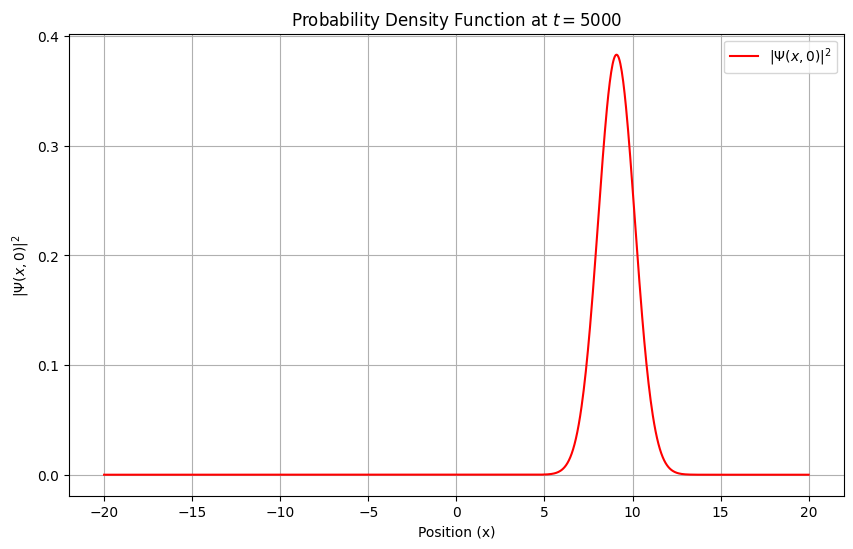

In [41]:
# Define the values
x_values = np.linspace(-20, 20, 1000)
mass = ctn.m_e
alpha_val = 2
k0_val = 5 * np.pi
hbar_val = ctn.hbar
time = 5000


def probability_density(x):
    # Coefficient
    coefficient = np.sqrt(2 / pi_val) * (mass * alpha_val) / np.sqrt(mass**2 * alpha_val**4 + 4 * hbar_val**2 * time**2)
    
    # First exponent
    exp1 = np.exp(-alpha_val**2 * k0_val**2 / 2)
    
    # Second exponent
    exp2_numerator = alpha_val**2 * mass * (alpha_val**4 * k0_val**2 * mass + 8 * hbar_val * k0_val * time * x - 4 * mass * x**2)
    exp2_denominator = 2 * (alpha_val**4 * mass**2 + 4 * hbar_val**2 * time**2)
    exp2 = np.exp(exp2_numerator / exp2_denominator)
    
    # Probability density
    density = coefficient * exp1 * exp2

    return density

# Evaluate the function for the x_values
y_values = [probability_density(x) for x in x_values]

# Convert the list to a NumPy array
y_values = np.array(y_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, c='red', label=r"$|\Psi(x,0)|^2$")
plt.yticks(np.arange(0, max(y_values) + 0.1, 0.1))
plt.xlabel('Position (x)')
plt.ylabel(r'$|\Psi(x,0)|^2$')
plt.title(r"Probability Density Function at $t=5000$")
plt.legend()
plt.grid(True)
plt.show()


As time t increases, we can se a displacement in our distribution, making us take into account on how wave packets behave by the localization and range of characteristics ripples have.